In [1]:
import numpy as np

Скачаем датасет load_boston и посмотрим на данные

In [2]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

In [3]:
X = load_boston()['data']
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
load_boston().feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X.shape

(506, 13)

In [6]:
y = load_boston()['target']
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Разобьем данные тренировачную и тестовую выборку

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
X_train.shape

(379, 13)

In [9]:
X_test.shape

(127, 13)

In [10]:
y_test.shape

(127,)

Реализуем дерево с одним листом, которое всегда будет предсказывать константу

In [13]:
class DecisionTreeRegressorFromScratch:

    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.ones(X.shape[0])

In [16]:
tree = DecisionTreeRegressorFromScratch()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [17]:
import matplotlib.pyplot as plt

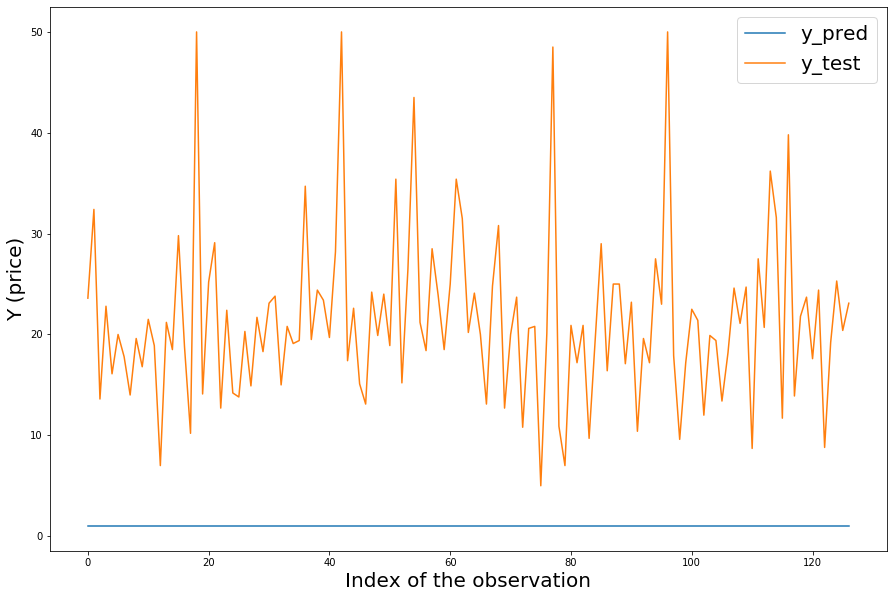

In [18]:
def plot_two_ys(y_pred, y_test):
    plt.figure(figsize=(15, 10))
    plt.plot(y_pred, label='y_pred')
    plt.plot(y_test, label='y_test')
    plt.legend(fontsize=20)
    plt.xlabel('Index of the observation', fontsize=20)
    plt.ylabel('Y (price)', fontsize=20)
    plt.show()

plot_two_ys(y_pred, y_test)

In [19]:
y_test.shape

(127,)

In [20]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

In [21]:
mse(y_test, y_pred)

486.73346456692906

Реализуем дерево с одним листом, которое всегда будет предсказывать среднее

In [23]:
class DecisionTreeRegressorFromScratch:

    def fit(self, X, y):
        self.mean_ = np.mean(y)

    def predict(self, X):
        return np.repeat(self.mean_, X.shape[0])

In [24]:
tree = DecisionTreeRegressorFromScratch()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse(y_test, y_pred)

72.2607627995582

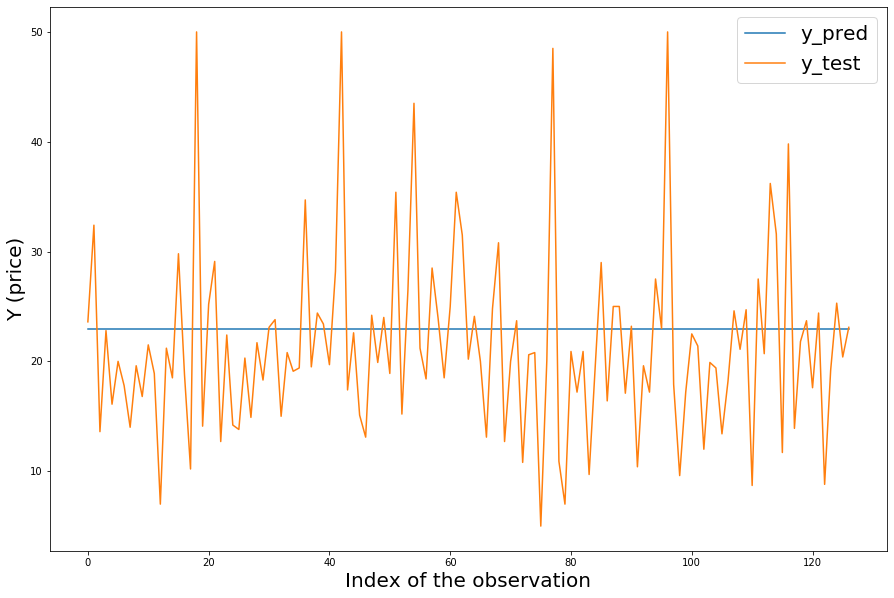

In [25]:
plot_two_ys(y_pred, y_test)

Реализуем дерево с одним листом, которое всегда будет предсказывать константу

In [26]:
X_train

array([[9.10300e-02, 0.00000e+00, 2.46000e+00, ..., 1.78000e+01,
        3.94120e+02, 4.82000e+00],
       [3.53501e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        8.80100e+01, 1.50200e+01],
       [3.57800e-02, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
        3.87310e+02, 3.76000e+00],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

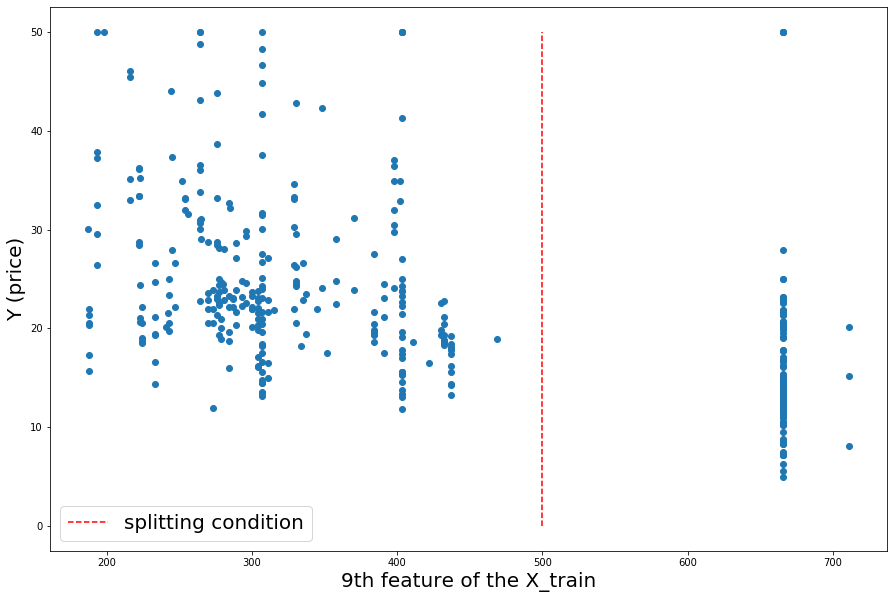

In [27]:
plt.figure(figsize=(15, 10))
plt.scatter(X_train[:, 9], y_train)
plt.xlabel('9th feature of the X_train', fontsize=20)
plt.ylabel('Y (price)', fontsize=20)
plt.plot([500, 500], [0, 50], c='r', linestyle='dashed',\
         label='splitting condition')
plt.legend(fontsize=20)

In [28]:
class DecisionTreeRegressorFromScratch:

    def fit(self, X, y, tree_path='0'):
        condition = X[:, 9] >= 500
        self.mean_1 = np.mean(y[condition])
        self.mean_2 = np.mean(y[~condition])

    def predict(self, X):
        n_rows = len(X)
        results = []
        for i in range(n_rows):
            if X[i, 9] >= 500:
                result = self.mean_1 
            else:
                result = self.mean_2
            results.append(result)
        return results

In [29]:
tree = DecisionTreeRegressorFromScratch()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse(y_test, y_pred)

58.38832728769185

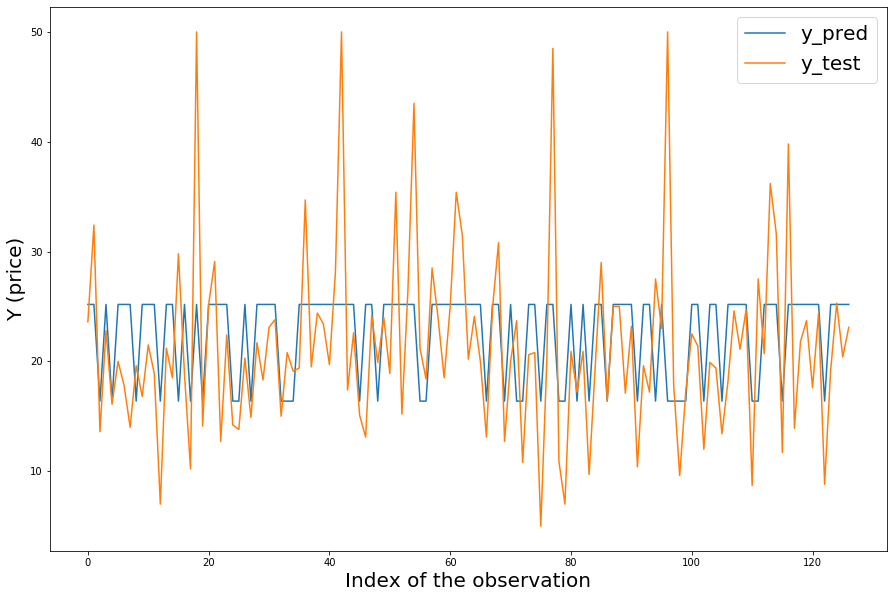

In [30]:
plot_two_ys(y_pred, y_test)

In [ ]:
Реализуем дерево с одним листом, используя минимальное MSE

In [32]:
class DecisionTreeRegressorFromScratch:

    def __init__(self):
        self.tree_ = {}

    def mse(self, y_true, y_pred):
        return np.mean(np.power(y_true - y_pred, 2))

    def fit(self, X, y, tree_path='0'):

        minimum_mse = None
        self.best_feature_ = None
        self.best_value_ = None

        for feature in range(X.shape[1]):
            for value in X[:, feature]:

                less_than_or_equal_obs = X[:, feature] <= value # select observations 
                                            # which are less than or equal to value

                # one part are observations which are less than or equal to this value
                X1, y1 = X[less_than_or_equal_obs], y[less_than_or_equal_obs]

                # second part are the others                                                          
                X2, y2 = X[~less_than_or_equal_obs], y[~less_than_or_equal_obs]

                # Calculate weighted MSE for a split
                MSE1 = self.mse(y1, np.mean(y1))
                MSE2 = self.mse(y2, np.mean(y2))
                weight_1 = len(y1) / len(y) # 1 / 379 
                weight_2 = len(y2) / len(y) # 378 / 379 
                weighted_mse = MSE1 * weight_1 + MSE2 * weight_2

                # Update MSE
                if minimum_mse is None or weighted_mse < minimum_mse:
                    minimum_mse = weighted_mse
                    self.best_feature_ = feature
                    self.best_value_ = value

        final_cond = X[:, self.best_feature_] >= self.best_value_
        self.mean_1 = np.mean(y[final_cond])
        self.mean_2 = np.mean(y[~final_cond])
    
    def predict(self, X):
        n_rows = len(X)
        results = []
        for i in range(n_rows):
            if X[i, self.best_feature_] >=  self.best_value_:
                result = self.mean_1 
            else:
                result = self.mean_2
            results.append(result)
        return np.array(results)

tree = DecisionTreeRegressorFromScratch()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse(y_test, y_pred)

45.187168040437285

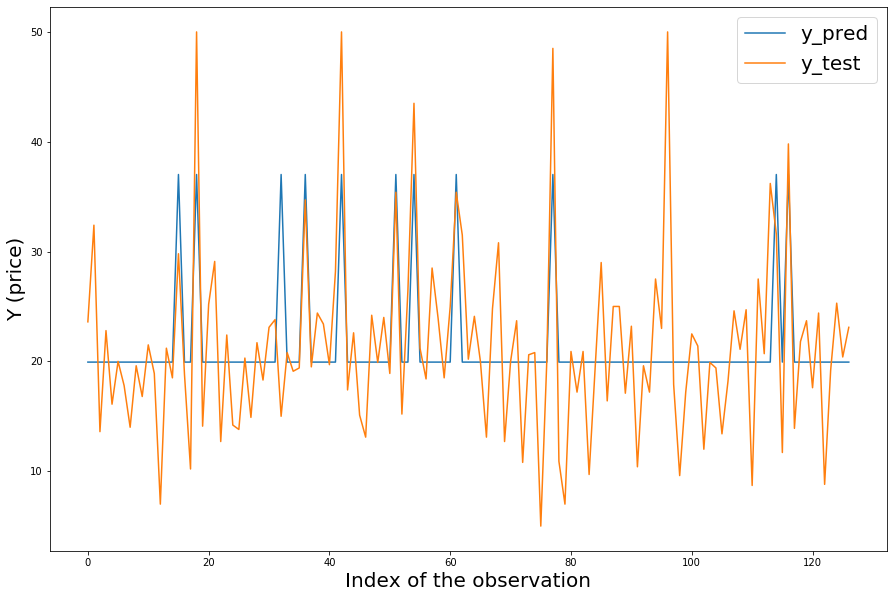

In [33]:
plot_two_ys(y_pred, y_test)

In [ ]:
Реализуем дерево с множеством листом, используя рекурсвино методы по поиску оптимального разбиения через минимальное MSE

In [37]:
class DecisionTreeRegressorFromScratch:

    def __init__(self, max_depth=None, min_samples_leaf=1):
        self.tree_ = {}
        self.max_depth_ = max_depth

    def mse(self, y_true, y_pred):
        return np.mean(np.power(y_true - y_pred, 2))

    def fit(self, X, y, tree_path='0'):

        # Decide if we should stop growing the tree
        if len(tree_path) - 1 == self.max_depth_ or X.shape[0] <= 1:
            self.tree_[tree_path] = np.mean(y)
            return

        minimum_mse = None
        best_split = None

        # For every unique value of every feature of X split the data in two parts: 
        #   one part are observations which are less than or equal to this value
        #   second part are the others
        # 1) Improve performance by regularizing.
        # np.random.shuffle(features)
        for feature in range(X.shape[1]):
            for value in sorted(set(X[:, feature])):

                less_than_or_equal_obs = X[:, feature] <= value # select observations 
                                                # which are less than or equal to value

                # one part are observations which are less than or equal to this value
                X1, y1 = X[less_than_or_equal_obs], y[less_than_or_equal_obs]

                # second part are the others                                                          
                X2, y2 = X[~less_than_or_equal_obs], y[~less_than_or_equal_obs]

                # Calculate weighted MSE for a split
                MSE1 = self.mse(y1, np.mean(y1))
                MSE2 = self.mse(y2, np.mean(y2))
                weight_1 = len(y1) / len(y) 
                weight_2 = len(y2) / len(y)
                weighted_mse = MSE1 * weight_1 + MSE2 * weight_2

            # Update MSE
            if minimum_mse is None or weighted_mse < minimum_mse:
                minimum_mse = weighted_mse
                best_split = (feature, value)

        # Get samples with best split
        feature, value = best_split
        splitting_condition = X[:, feature] <= value
        X1, y1, X2, y2 = X[splitting_condition], y[splitting_condition],\
                          X[~splitting_condition], y[~splitting_condition]

        #  Add the splitting condition to tree
        self.tree_[tree_path] = best_split

        # Continue growing the tree
        self.fit(X1, y1, tree_path=tree_path + '0')
        self.fit(X2, y2, tree_path=tree_path + '1')

    def predict(self, X):
        results = []
        for i in range(X.shape[0]):
            tree_path = '0'
            while True:
                value_for_path = self.tree_[tree_path]
                if type(value_for_path) != tuple:
                    result = value_for_path
                    break
                feature, value = value_for_path
                if X[i, feature] <= value:
                    tree_path += '0'
                else:
                    tree_path += '1' 
            results.append(result)
        return np.array(results)

tree = DecisionTreeRegressorFromScratch()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse(y_test, y_pred)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Program Files (x86)\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-b704dee429c6>", line 80, in <module>
    tree.fit(X_train, y_train)
  File "<ipython-input-37-b704dee429c6>", line 59, in fit
    self.fit(X1, y1, tree_path=tree_path + '0')
  File "<ipython-input-37-b704dee429c6>", line 59, in fit
    self.fit(X1, y1, tree_path=tree_path + '0')
  File "<ipython-input-37-b704dee429c6>", line 59, in fit
    self.fit(X1, y1, tree_path=tree_path + '0')
  [Previous line repeated 1472 more times]
  File "<ipython-input-37-b704dee429c6>", line 35, in fit
    X2, y2 = X[~less_than_or_equal_obs], y[~less_than_or_equal_obs]
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Program Files (x86)\anaconda3\lib\site-packages\IPython\core\interactiveshell.p

KeyboardInterrupt: 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Load Boston house prices dataset
X, y = load_boston()['data'], load_boston()['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 1) Implement.
class DecisionTreeRegressorFromScratch:

    def __init__(self, max_depth=None, min_samples_leaf=1):
        self.tree_ = {}
        self.max_depth_ = max_depth

    def mse(self, y_true, y_pred):
        return np.mean(np.power(y_true - y_pred, 2))

    def fit(self, X, y, tree_path='0'):

    if len(tree_path) - 1 == self.max_depth_ or X.shape[0] <= 1:
        self.tree_[tree_path] = np.mean(y)
        return

    minimum_mse = None
    best_split = None

    # For every unique value of every feature of X split the data in two parts: 
    #   one part are observations which are less than or equal to this value
    #   second part are the others
    for feature in range(X.shape[1]):
        for value in sorted(set(X[:, feature])):

            less_than_or_equal_obs = X[:, feature] <= value # select observations 
                                            # which are less than or equal to value

            # one part are observations which are less than or equal to this value
            X1, y1 = X[less_than_or_equal_obs], y[less_than_or_equal_obs]

            # second part are the others                                                          
            X2, y2 = X[~less_than_or_equal_obs], y[~less_than_or_equal_obs]

            # Calculate weighted MSE for a split
            MSE1 = self.mse(y1, np.mean(y1))
            MSE2 = self.mse(y2, np.mean(y2))
            weight_1 = len(y1) / len(y) 
            weight_2 = len(y2) / len(y)
            weighted_mse = MSE1 * weight_1 + MSE2 * weight_2

        # Update MSE
        if minimum_mse is None or weighted_mse < minimum_mse:
            minimum_mse = weighted_mse
            best_split = (feature, value)

    # Get samples with best split
    feature, value = best_split
    splitting_condition = X[:, feature] <= value
    X1, y1, X2, y2 = X[splitting_condition], y[splitting_condition],\
                      X[~splitting_condition], y[~splitting_condition]

    #  Add the splitting condition to tree
    self.tree_[tree_path] = best_split

    # Continue growing the tree
    self.fit(X1, y1, tree_path=tree_path + '0')
    self.fit(X2, y2, tree_path=tree_path + '1')
    
    def predict(self, X):
        results = []
        for i in range(X.shape[0]):
        tree_path = '0'
        while True:
            value_for_path = self.tree_[tree_path]
            if type(value_for_path) != tuple:
                result = value_for_path
                break
            feature, value = value_for_path
            if X[i, feature] <= value:
            tree_path += '0'
            else:
                tree_path += '1' 
            results.append(result)
        return np.array(results)

class GradientBoostingRegressorFromScratch:

    def fit(self, X, y):

        self.trees = [] # Create a list to store trees

        for i in range(100):
            tree = DecisionTreeRegressorFromScratch(3)
            tree.fit(X, y - self.predict(X)) # Fit the tree to data
            self.trees.append(tree) # Add the tree to the list of trees

    def predict(self, X):

        # Create array to store predictions
        trees_predictions = np.zeros((len(X), len(self.trees)))

        # Predict for each observation for each tree
        for i, tree in enumerate(self.trees):

          # Predict with a tree and multiply by learning rate
          trees_predictions[:, i] = tree.predict(X) * (1 if i == 0 else 0.1)

        # Return a sum of all trees predictions for each observation
        return np.sum(trees_predictions, axis=1) 

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# 2) Measure performance — sklearn. 
np.random.seed(42)
sklearn_model = GradientBoostingRegressor()
sklearn_model.fit(X_train, y_train)
sklearn_y_pred = sklearn_model.predict(X_test)
print(f'Sklearn score:', mse(y_test, sklearn_y_pred))

# 3) Measure performance — our implementation. 
np.random.seed(42)
from_scratch_model = GradientBoostingRegressorFromScratch()
trained_from_scratch = from_scratch_model.fit(X_train, y_train)
from_scratch_y_pred = from_scratch_model.predict(X_test)
print(f'GradientBoostingRegressorFromScratch score:', mse(y_test, from_scratch_y_pred))